# Formula 1 Data Analisys

<h3>Packages</h3>

In [275]:
import pandas as pd
import numpy as np
from IPython.display import display_html 
import matplotlib.pyplot as plt

ActualYear = 2021

Years = list()
Years = [i for i in range(1958,ActualYear)]

### Import the data

In [276]:
DriverRaw = list()
DriverRaw = [pd.read_html('https://www.formula1.com/en/results.html/'+str(i)+'/drivers.html') for i in range(1958,ActualYear)] 

In [277]:
TeamsRaw = list()
TeamsRaw = [pd.read_html('https://www.formula1.com/en/results.html/'+str(i)+'/team.html') for i in range(1958,ActualYear)] 

In [278]:
RacesRaw = list()
RacesRaw = [pd.read_html('https://www.formula1.com/en/results.html/'+str(i)+'/races.html') for i in range(1958,ActualYear)]

### Save Data as .csv files

In [121]:
for year in Years: 
    DriverRaw[year-1958][0].to_csv(r'.\data\Drivers'+str(year)+'.csv', index = False)
    TeamsRaw[year-1958][0].to_csv(r'.\data\Teams'+str(year)+'.csv', index = False)
    RacesRaw[year-1958][0].to_csv(r'.\data\Races'+str(year)+'.csv', index = False)

KeyError: 0

In [122]:
DriverRaw = list()
DriverRaw = [pd.read_csv('.\data\Drivers'+str(i)+'.csv') for i in Years] 
TeamsRaw = list()
TeamsRaw = [pd.read_csv('.\data\Teams'+str(i)+'.csv') for i in Years] 
RacesRaw = list()
RacesRaw = [pd.read_csv('.\data\Races'+str(i)+'.csv') for i in Years] 

In [123]:
for year in Years: 
    DriverRaw[year-1958] = pd.DataFrame(DriverRaw[year-1958])
    TeamsRaw[year-1958] = pd.DataFrame(TeamsRaw[year-1958])
    RacesRaw[year-1958] = pd.DataFrame(RacesRaw[year-1958])

In [124]:
print(TeamsRaw[0].head())
print(DriverRaw[0].head())
print(RacesRaw[0].head())

   Unnamed: 0  Pos           Team  PTS  Unnamed: 4
0         NaN    1        Vanwall   48         NaN
1         NaN    2        Ferrari   40         NaN
2         NaN    3  Cooper Climax   31         NaN
3         NaN    4            BRM   18         NaN
4         NaN    5       Maserati    6         NaN
   Unnamed: 0  Pos               Driver Nationality            Car  PTS  \
0         NaN    1  Mike  Hawthorn  HAW         GBR        Ferrari   42   
1         NaN    2  Stirling  Moss  MOS         GBR        Vanwall   41   
2         NaN    3    Tony  Brooks  BRO         GBR        Vanwall   24   
3         NaN    4  Roy  Salvadori  SAL         GBR  Cooper Climax   15   
4         NaN    5  Peter  Collins  COL         GBR        Ferrari   14   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
   Unnamed: 0        Grand Prix         Date                    Winner  \
0         NaN         Argentina  19 Jan 1958       Stirling  Moss  MOS   

In [125]:
print(f'Total Drivers: {len(DriverRaw)}')
print(f'Total Teams: {len(TeamsRaw)}')
DriverDataAll[5].head()

Total Drivers: 62
Total Teams: 62


,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Unnamed: 6
0,NaN,1,Jim Clark CLA,GBR,Lotus Climax,54,NaN
1,NaN,2,Graham Hill HIL,GBR,BRM,29,NaN
2,NaN,2,Richie Ginther GIN,USA,BRM,29,NaN
3,NaN,4,John Surtees SUR,GBR,Ferrari,22,NaN
4,NaN,5,Dan Gurney GUR,USA,Brabham Climax,19,NaN


### Number of Driver Champions and Constructors Champions

#### Constructors

In [126]:
ConstructorChampions = [TeamsRaw[i].Team[0] for i in range(0,ActualYear-1958)]

UniqueTeamsChampionms = np.array(ConstructorChampions)

for team in np.unique(UniqueTeamsChampionms):
    print(team,": ", ConstructorChampions.count(team))



BRM :  1
Benetton Renault :  1
Brabham Repco :  2
Brawn Mercedes :  1
Cooper Climax :  2
Ferrari :  16
Lotus Climax :  2
Lotus Ford :  5
Matra Ford :  1
McLaren Ford :  1
McLaren Honda :  4
McLaren Mercedes :  1
McLaren TAG :  2
Mercedes :  6
RBR Renault :  1
Red Bull Racing Renault :  3
Renault :  2
Tyrrell Ford :  1
Vanwall :  1
Williams Ford :  2
Williams Honda :  2
Williams Renault :  5


#### Drivers

In [127]:
DriversChampions = [DriverRaw[i].Driver[0] for i in range(0,ActualYear-1958)]
uniqueDriversChampions = np.array(DriversChampions)

WDCPerDriver = pd.DataFrame(columns=["Driver","WDC"])

for driver in np.unique(uniqueDriversChampions):
    WDCPerDriver = WDCPerDriver.append({'Driver':driver,'WDC':DriversChampions.count(driver)},ignore_index=True)

WDCPerDriver.sort_values(by=["WDC"],ascending=False)

,Driver,WDC
21,Michael Schumacher MSC,7
19,Lewis Hamilton HAM,6
0,Alain Prost PRO,4
29,Sebastian Vettel VET,4
8,Jack Brabham BRA,3
9,Jackie Stewart STE,3
27,Niki Lauda LAU,3
24,Nelson Piquet PIQ,3
2,Ayrton Senna SEN,3
6,Fernando Alonso ALO,2


## All

### Drivers

#### Difference in WDC between 1st and 2nd, and 1st and 3th

In [128]:
Drivers1and2Diff = [DriverRaw[i].PTS[0]-DriverRaw[i].PTS[1] for i in range(0,ActualYear-1958)] 
Drivers1and3Diff = [DriverRaw[i].PTS[0]-DriverRaw[i].PTS[2] for i in range(0,ActualYear-1958)] 

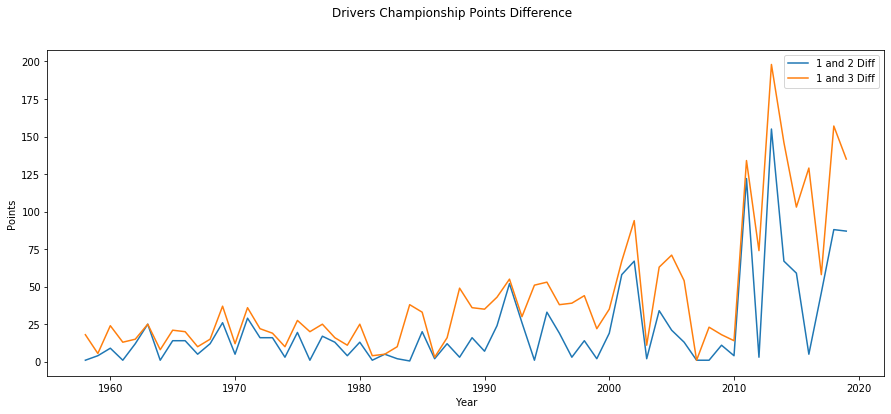

In [221]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15, 6))
plt.plot(Years,Drivers1and2Diff)
plt.plot(Years,Drivers1and3Diff)
plt.suptitle('Drivers Championship Points Difference')
plt.xlabel("Year")
plt.ylabel("Points")
#plt.show()
plt.legend(["1 and 2 Diff", "1 and 3 Diff"])

In [130]:
MaxDiff= max(Drivers1and2Diff)
print(MaxDiff,"points between 1rs and 2nd in",Years[Drivers1and2Diff.index(MaxDiff)])
DriverRaw[Drivers1and2Diff.index(MaxDiff)].loc[0:1]

155 points between 1rs and 2nd in 2013


,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Unnamed: 6
0,NaN,1,Sebastian Vettel VET,GER,Red Bull Racing Renault,397,NaN
1,NaN,2,Fernando Alonso ALO,ESP,Ferrari,242,NaN


In [131]:
MinDiff= min(Drivers1and2Diff)
print(MinDiff,"points between 1rs and 2nd in",Years[Drivers1and2Diff.index(MinDiff)])
DriverRaw[Drivers1and2Diff.index(MinDiff)].loc[0:1]

0.5 points between 1rs and 2nd in 1984


,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Unnamed: 6
0,NaN,1,Niki Lauda LAU,AUT,McLaren TAG,72.0,NaN
1,NaN,2,Alain Prost PRO,FRA,McLaren TAG,71.5,NaN


#### Difference in WDC between 1st and 2nd, and 1st and 3th in % considering the total of the 2nd and 3th respect to the 1st

In [132]:
Drivers1and2DiffPerc = [(Drivers1and2Diff[i]/DriverRaw[i].PTS[1])*100 for i in range(0,ActualYear-1958)] 
Drivers1and3DiffPerc = [(Drivers1and3Diff[i]/DriverRaw[i].PTS[2])*100 for i in range(0,ActualYear-1958)] 

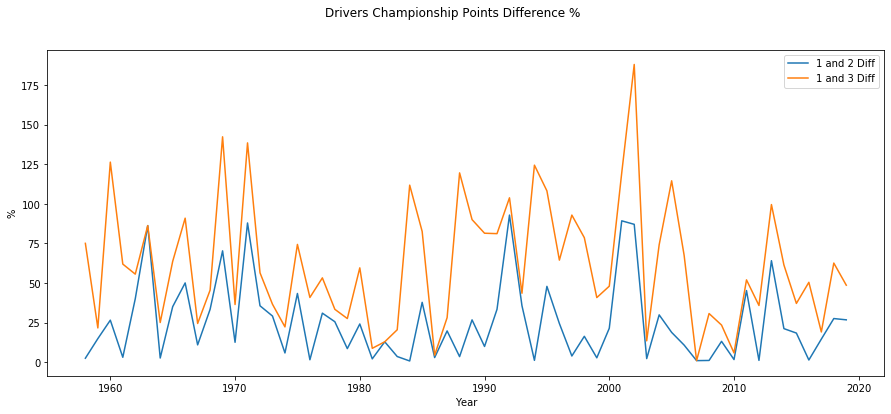

In [220]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15, 6))
plt.plot(Years,Drivers1and2DiffPerc)
plt.plot(Years,Drivers1and3DiffPerc)
plt.suptitle('Drivers Championship Points Difference %')
plt.xlabel("Year")
plt.ylabel("%")
plt.legend(["1 and 2 Diff", "1 and 3 Diff"])

## Constructors

### Difference in WCC between 1st and 2nd, and 1st and 3th

In [134]:
Teams1and2Diff = [TeamsRaw[i].PTS[0]-TeamsRaw[i].PTS[1] for i in range(0,ActualYear-1958)] 
Teams1and3Diff = [TeamsRaw[i].PTS[0]-TeamsRaw[i].PTS[2] for i in range(0,ActualYear-1958)] 

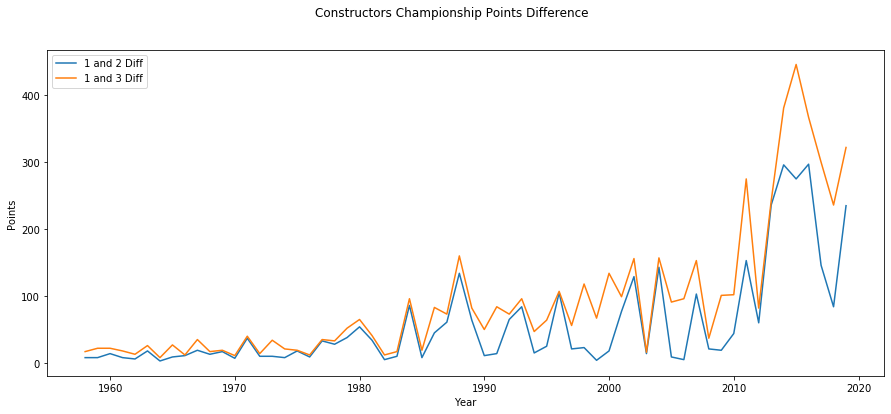

In [219]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15, 6))
plt.plot(Years,Teams1and2Diff)
plt.plot(Years,Teams1and3Diff)
plt.suptitle('Constructors Championship Points Difference')
plt.xlabel("Year")
plt.ylabel("Points")
plt.legend(["1 and 2 Diff", "1 and 3 Diff"])

In [136]:
MaxDiff= max(Teams1and2Diff)
print(MaxDiff,"points between 1rs and 2nd in",Years[Teams1and2Diff.index(MaxDiff)])
TeamsRaw[Teams1and2Diff.index(MaxDiff)].loc[0:1]

297 points between 1rs and 2nd in 2016


,Unnamed: 0,Pos,Team,PTS,Unnamed: 4
0,NaN,1,Mercedes,765,NaN
1,NaN,2,Red Bull Racing TAG Heuer,468,NaN


In [137]:
MinDiff= min(Teams1and2Diff)
print(MinDiff,"points between 1rs and 2nd in",Years[Teams1and2Diff.index(MinDiff)])
TeamsRaw[Teams1and2Diff.index(MinDiff)].loc[0:1]

3 points between 1rs and 2nd in 1964


,Unnamed: 0,Pos,Team,PTS,Unnamed: 4
0,NaN,1,Ferrari,45,NaN
1,NaN,2,BRM,42,NaN


### Difference in WCC between 1st and 2nd, and 1st and 3th in % considering the total of the 2nd and 3th respect to the 1st

In [138]:
Teams1and2DiffPerc = [(Teams1and2Diff[i]/TeamsRaw[i].PTS[1])*100 for i in range(0,ActualYear-1958)] 
Teams1and3DiffPerc = [(Teams1and3Diff[i]/TeamsRaw[i].PTS[2])*100 for i in range(0,ActualYear-1958)] 

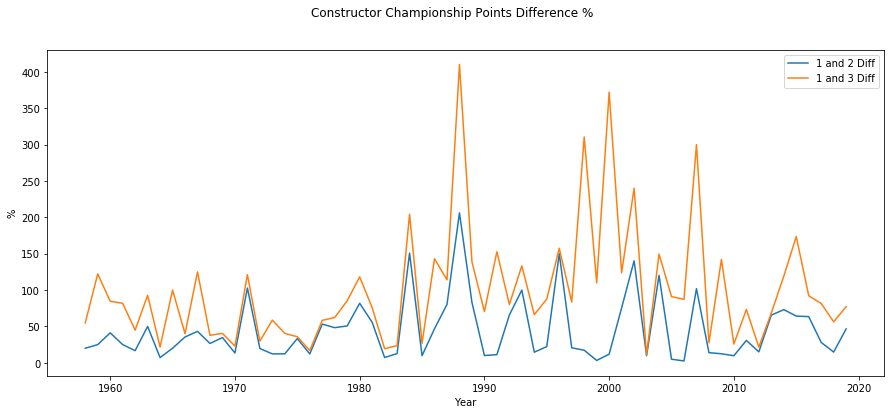

In [218]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15, 6))
plt.plot(Years,Teams1and2DiffPerc)
plt.suptitle('Constructor Championship Points Difference %')
plt.xlabel("Year")
plt.ylabel("%")
plt.plot(Years,Teams1and3DiffPerc)
plt.legend(["1 and 2 Diff", "1 and 3 Diff"])

<h1> </h1>

## Races

### Cout races per year

In [140]:
RacesCount = [RacesRaw[i].shape[0] for i in range(0,ActualYear-1958)]

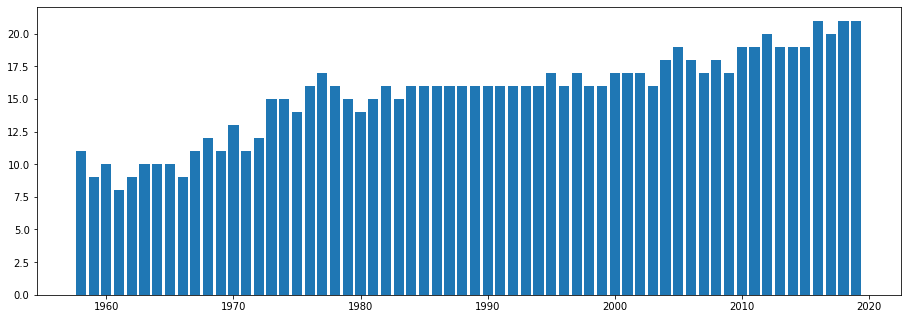

In [217]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(Years,RacesCount)
plt.show()

<h1></h1>

### Races won by the WDC per year

In [142]:
year = 0
count = 0
RacesWinChampions = list()
for driver in DriversChampions:
    for race in RacesRaw[year].Winner:
        if driver==race:
            count=count+1
    year=year+1
    RacesWinChampions.append(count)
    count=0

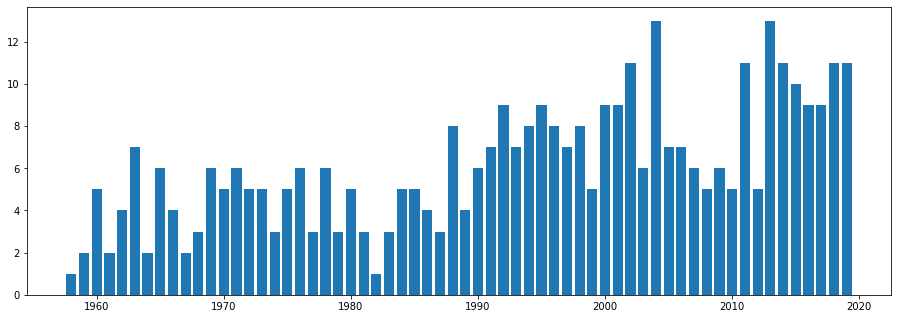

In [216]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(Years,RacesWinChampions)
plt.show()

In [304]:
MostWins=max(RacesWinChampions)
print("Most races wins in a year is",MostWins,"by",DriversChampions[RacesWinChampions.index(MostWins)],"in",Years[RacesWinChampions.index(MostWins)])

LessWins=min(RacesWinChampions)
print("Less races wins in a year is",LessWins,"by",DriversChampions[RacesWinChampions.index(LessWins)],"in",Years[RacesWinChampions.index(LessWins)],", and Keke  Rosberg  ROS in 1982")

Most races wins in a year is 13 by Michael  Schumacher  MSC in 2004
Less races wins in a year is 1 by Mike  Hawthorn  HAW in 1958 , and Keke  Rosberg  ROS in 1982


### Races won by the WDC per year in % respect the total races

In [210]:
RacesWinChampionsPerc = list()
RacesWinChampionsPerc = [(RacesWinChampions[year]/RacesCount[year])*100 for year in range(0,len(Years))]

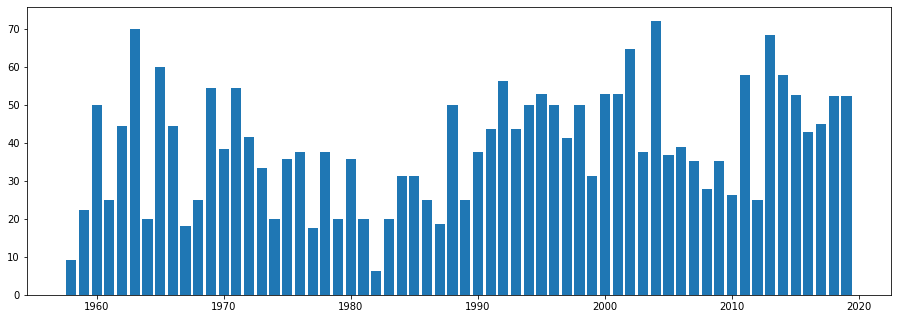

In [215]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(Years,RacesWinChampionsPerc)
plt.show()

In [285]:
MostPerWins=max(RacesWinChampionsPerc)
print("Most races wins in a year is",MostPerWins,"% by",DriversChampions[RacesWinChampionsPerc.index(MostPerWins)],"in",Years[RacesWinChampionsPerc.index(MostPerWins)])

LessPerWins=min(RacesWinChampionsPerc)
print("Less races wins in a year is",LessPerWins,"% by",DriversChampions[RacesWinChampionsPerc.index(LessPerWins)],"in",Years[RacesWinChampionsPerc.index(LessPerWins)])

Most races wins in a year is 72.22222222222221 % by Michael  Schumacher  MSC in 2004
Less races wins in a year is 6.25 % by Keke  Rosberg  ROS in 1982


<h1> </h1>

## Races

In [148]:
RacesRaw = pd.DataFrame(RacesRaw)
CountriesRacesList=list()
CountriesRaces = pd.DataFrame(columns=["GPs","Times"])

for year in Years:
    for race in np.unique(RacesRaw[0][year-1958]["Grand Prix"]):
        CountriesRacesList.append(race)
        
uniqueGPs = np.array(CountriesRacesList)

for race in np.unique(uniqueGPs):
    CountriesRaces = CountriesRaces.append({'GPs':race,'Times':CountriesRacesList.count(race)},ignore_index=True)

Exit = CountriesRaces.sort_values(by=["Times"],ascending=False)


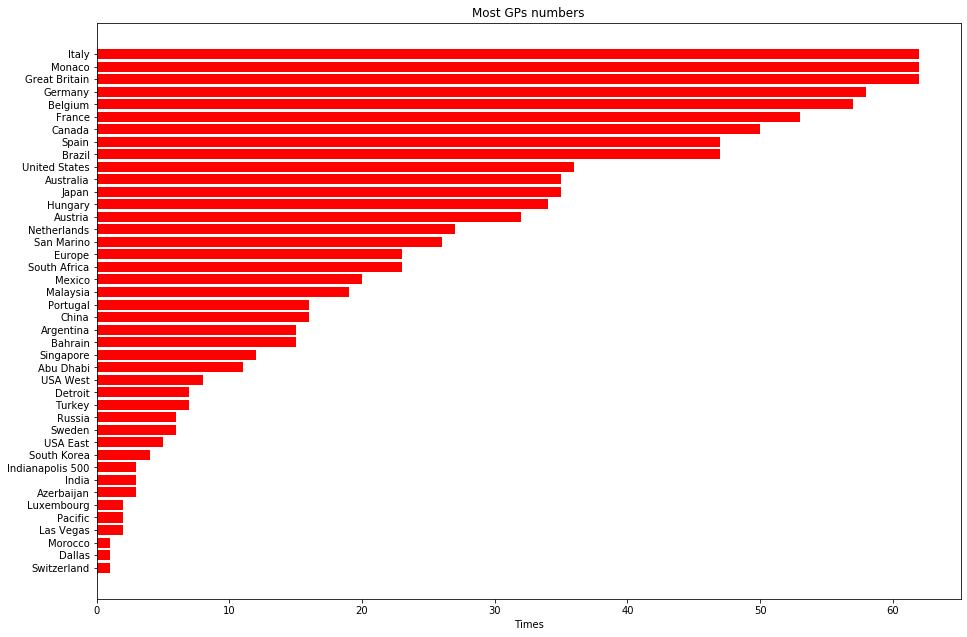

In [274]:
import matplotlib.pyplot as plt

fig, plt = plt.subplots()
plt = fig.add_axes([0,0,2,2])

plt.set_title('Most GPs numbers')
plt.set_xlabel('Times')

plt.barh(Exit["GPs"], Exit["Times"],color="red")
plt.invert_yaxis()

<h3>More laps race and Less laps race</h3>

In [283]:
RacesRaw = pd.DataFrame(RacesRaw)
Laps = 0

for year in Years:
    for race in range(0,(len(RacesRaw[0][year-1958])-1)):
        if int(RacesRaw[0][year-1958].loc[race].Laps) > Laps and (int(RacesRaw[0][year-1958].loc[race].Laps)<200):
            Laps = int(RacesRaw[0][year-1958].loc[race].Laps)
            Carrera = RacesRaw[0][year-1958].loc[race]

pd.DataFrame(Carrera)

,7
Unnamed: 0,NaN
Grand Prix,United States
Date,06 Oct 1963
Winner,Graham Hill HIL
Car,BRM
Laps,110
Time,2:19:22.100
Unnamed: 7,NaN


In [284]:
RacesRaw = pd.DataFrame(RacesRaw)
Laps = 200

for year in Years:
    for race in range(0,(len(RacesRaw[0][year-1958])-1)):
        if int(RacesRaw[0][year-1958].loc[race].Laps) < Laps:
            Laps = int(RacesRaw[0][year-1958].loc[race].Laps)
            Carrera = RacesRaw[0][year-1958].loc[race]

pd.DataFrame(Carrera)

,6
Unnamed: 0,NaN
Grand Prix,Germany
Date,01 Aug 1971
Winner,Jackie Stewart STE
Car,Tyrrell Ford
Laps,12
Time,1:29:15.700
Unnamed: 7,NaN


In [302]:
DriversChampions[RacesWinChampionsPerc.index(LessPerWins)]

'Keke  Rosberg  ROS'